# Team

**Gabriela Nathania H.** <br>
2201797494

**Hubert** <br>
2201727292

**Ryan Siautama**<br>
2201743062

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from scipy import stats
from scipy.fft import fft
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score	
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

# Load Dataset

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
features = [
            'Time', 
            'T1', 
            'T2', 
            'T3', 
            'T4', 
            'T5', 
            'T6', 
            'T7', 
            'T8', 
            'T9', 
            'T10',
            'T11',
            'T12',
            'T13',
            'T14',
            'T15']

# Check NaN

In [ ]:
train.isna().any()

Time    False
T1      False
T2      False
T3      False
T4      False
T5      False
T6      False
T7      False
T8      False
T9      False
T10     False
T11     False
T12     False
T13     False
T14     False
T15     False
Y       False
dtype: bool

In [ ]:
test.isna().any()

Time    False
T1      False
T2      False
T3      False
T4      False
T5      False
T6      False
T7      False
T8      False
T9      False
T10     False
T11     False
T12     False
T13     False
T14     False
T15     False
dtype: bool

# Data Statistic

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284707.0,94813.515161,47488.613938,0.000000,54201.000000,84685.000000,139320.000000,172792.000000
T1,284707.0,0.000760,1.956265,-56.407510,-0.920085,0.018342,1.315664,2.454930
T2,284707.0,0.001182,1.511590,-48.325589,-0.889749,0.179953,1.027396,9.382558
T3,284707.0,0.000460,1.378181,-113.743307,-0.691397,-0.054265,0.611926,34.801666
T4,284707.0,0.000942,1.232047,-43.557242,-0.553828,0.040217,0.570534,120.589494
T5,284707.0,0.000450,1.097761,-13.434066,-0.642799,-0.051216,0.597318,15.594995
T6,284707.0,0.001013,0.994399,-18.683715,-0.405250,0.140141,0.618273,7.848392
T7,284707.0,0.001136,0.952749,-19.214325,-0.425253,0.050736,0.493242,10.526766
T8,284707.0,0.000739,0.873291,-14.129855,-0.467725,0.066526,0.523365,17.315112
T9,284707.0,0.000350,0.836953,-9.498746,-0.498691,-0.003567,0.500814,5.041069


In [ ]:
train['Y'].value_counts()

0    284265
1       442
Name: Y, dtype: int64

Test Train Data

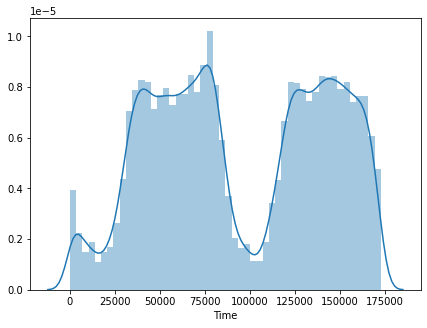

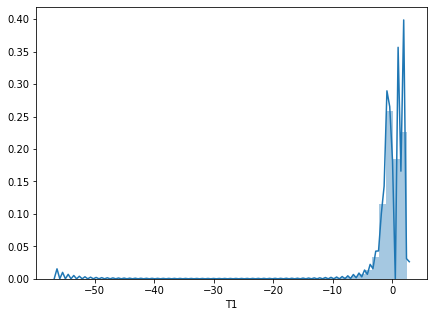

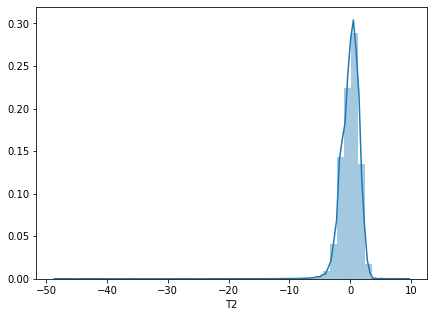

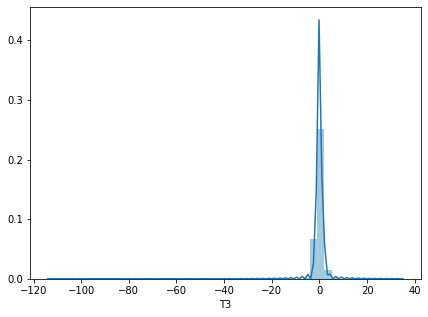

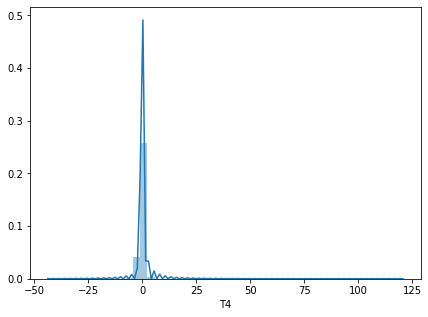

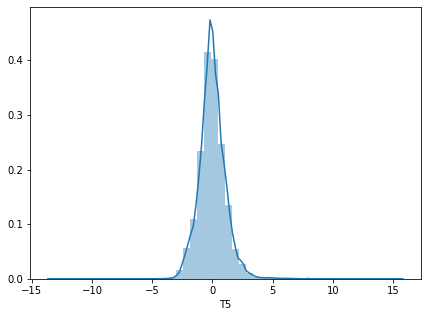

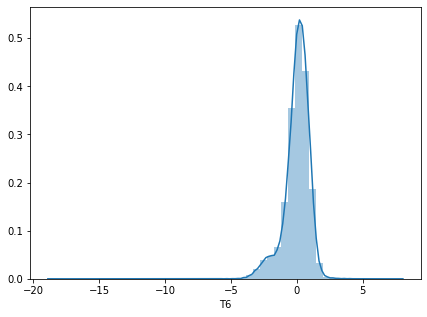

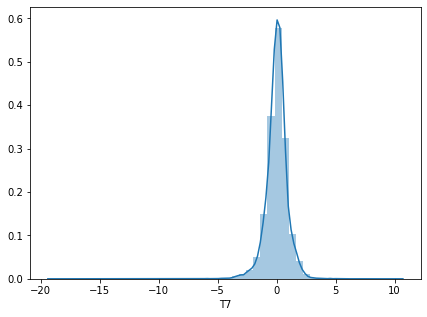

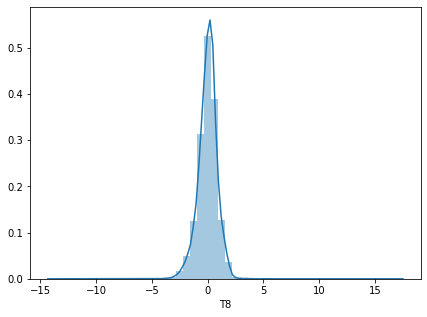

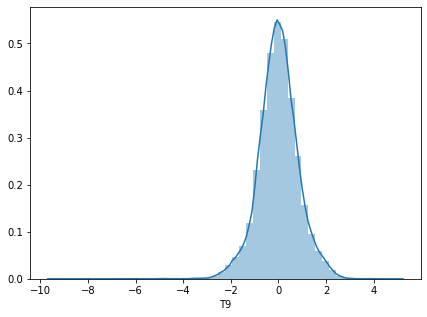

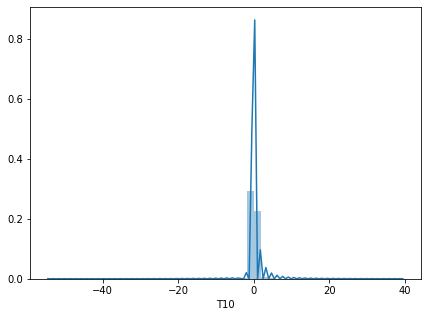

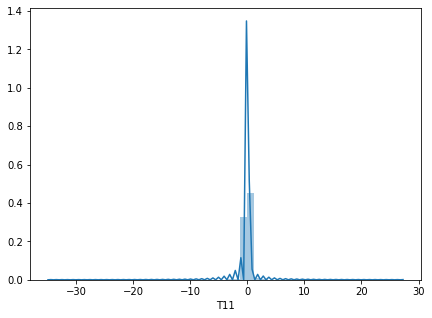

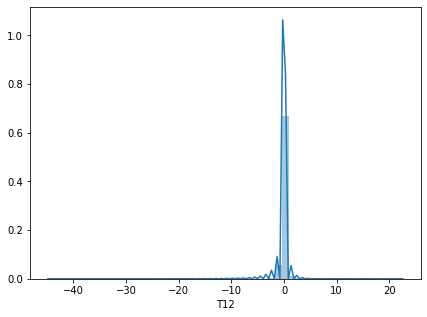

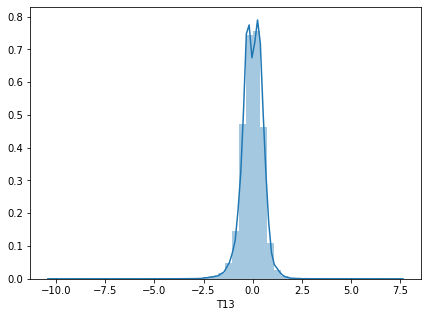

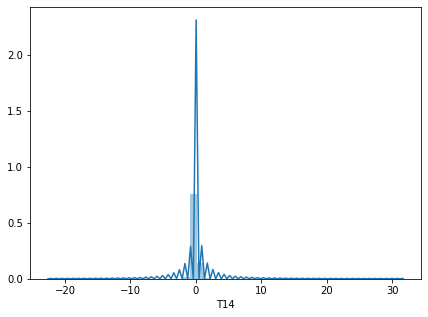

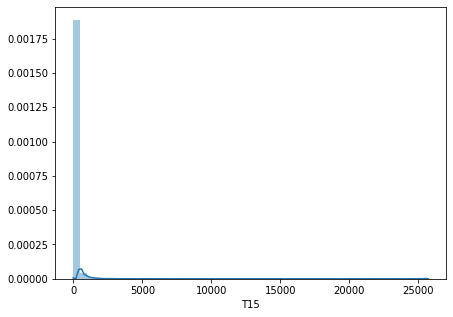

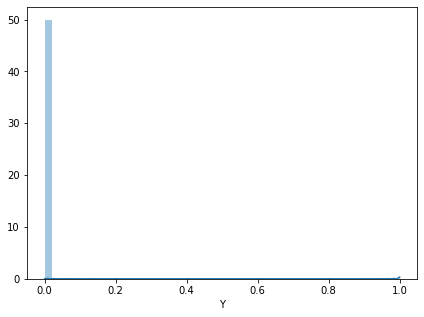

In [ ]:
for i in train.columns:
  plt.figure(figsize=(7,5))
  sns.distplot(train[i])

Plot Test Data

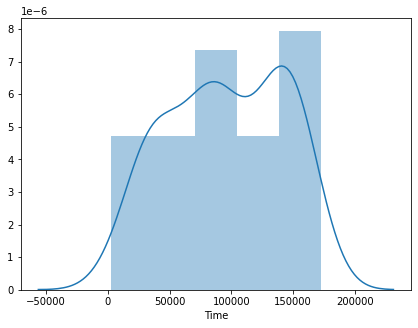

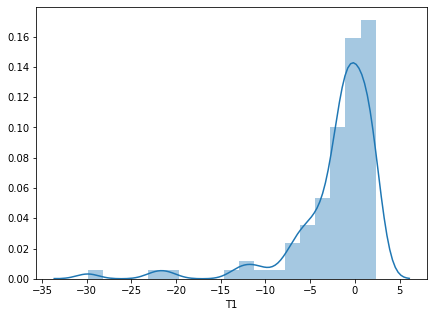

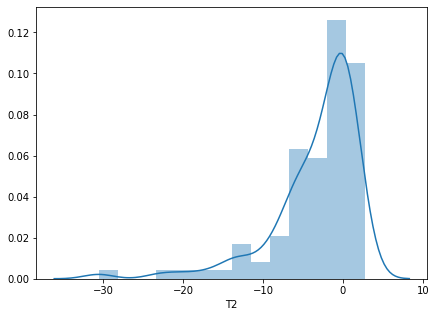

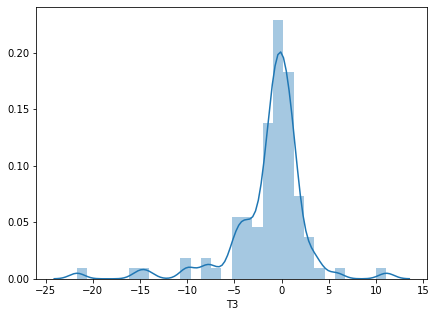

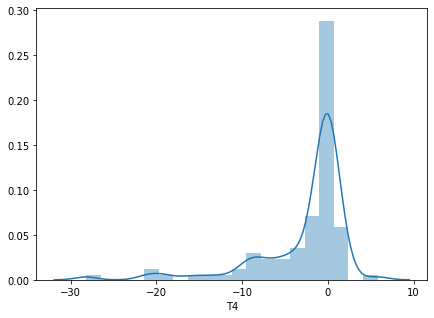

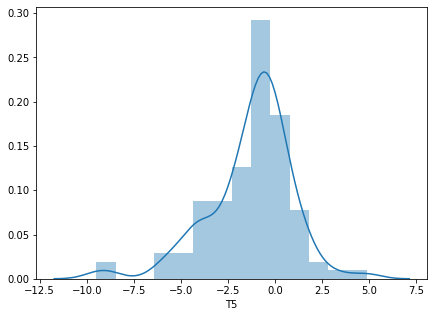

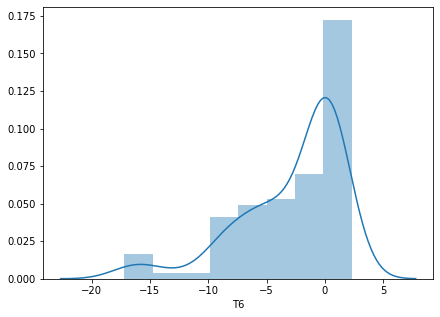

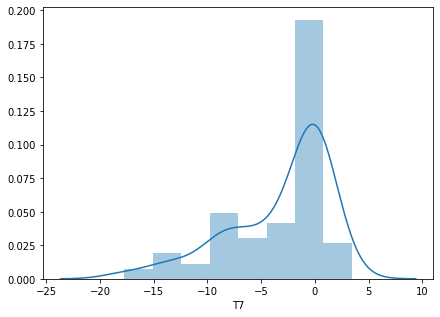

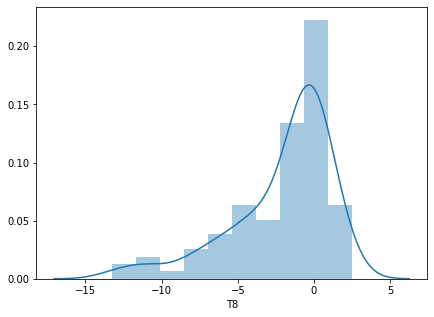

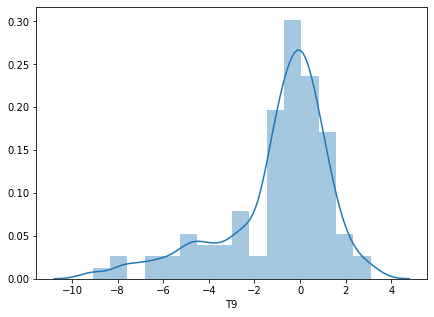

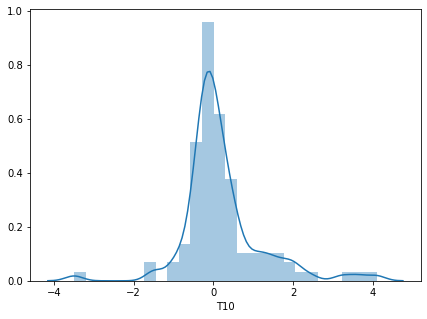

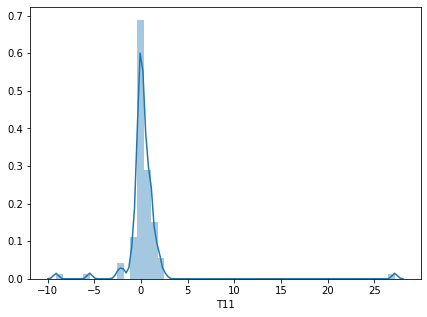

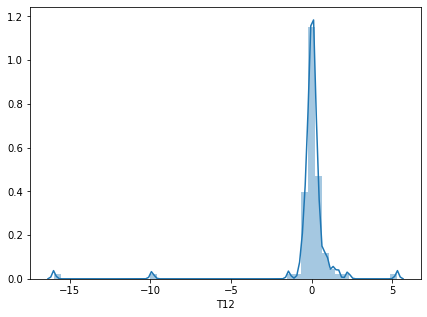

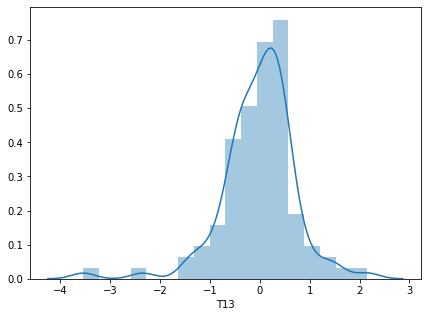

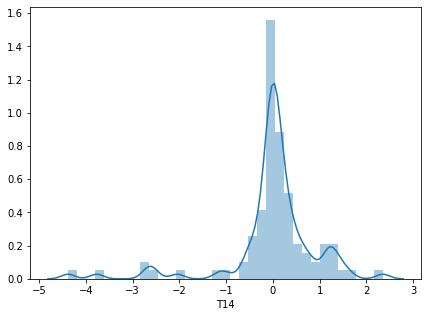

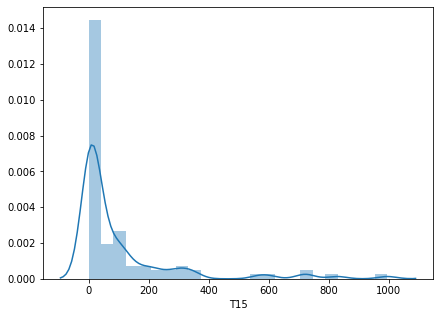

In [ ]:
for i in test.columns:
  plt.figure(figsize=(7,5))
  sns.distplot(test[i])

Skewness Train Data

In [ ]:
for i in train.columns:
  print("Skew score", i, train[i].skew())

Skew score Time -0.035532276958068126
Skew score T1 -3.268458388286945
Skew score T2 -2.1897263995440097
Skew score T3 -2.4129276794605263
Skew score T4 2.7029701232455214
Skew score T5 0.5632807436952851
Skew score T6 -2.2014277885837332
Skew score T7 -1.8833281009675014
Skew score T8 -1.0459004976078041
Skew score T9 -0.24169599946460707
Skew score T10 -2.0396500188084206
Skew score T11 3.4533954956195565
Skew score T12 -5.835828617129984
Skew score T13 -0.41501795697530935
Skew score T14 -1.1646611026354134
Skew score T15 16.979349262352667
Skew score Y 25.320777927397724


Skewness Test Data

In [ ]:
for i in test.columns:
  print("Skew score", i, test[i].skew())

Skew score Time -0.14369617709461183
Skew score T1 -2.9461506683691594
Skew score T2 -2.20616437184226
Skew score T3 -1.9124647465003997
Skew score T4 -2.33361867036751
Skew score T5 -0.8988852450531688
Skew score T6 -1.3987726403830845
Skew score T7 -1.227335399083874
Skew score T8 -1.427575994564813
Skew score T9 -1.3180830779553885
Skew score T10 1.0176078123393015
Skew score T11 6.778251058095881
Skew score T12 -5.9407784656388465
Skew score T13 -1.1342670815852245
Skew score T14 -1.930691427058739
Skew score T15 2.8577509563889403


Train Correlation

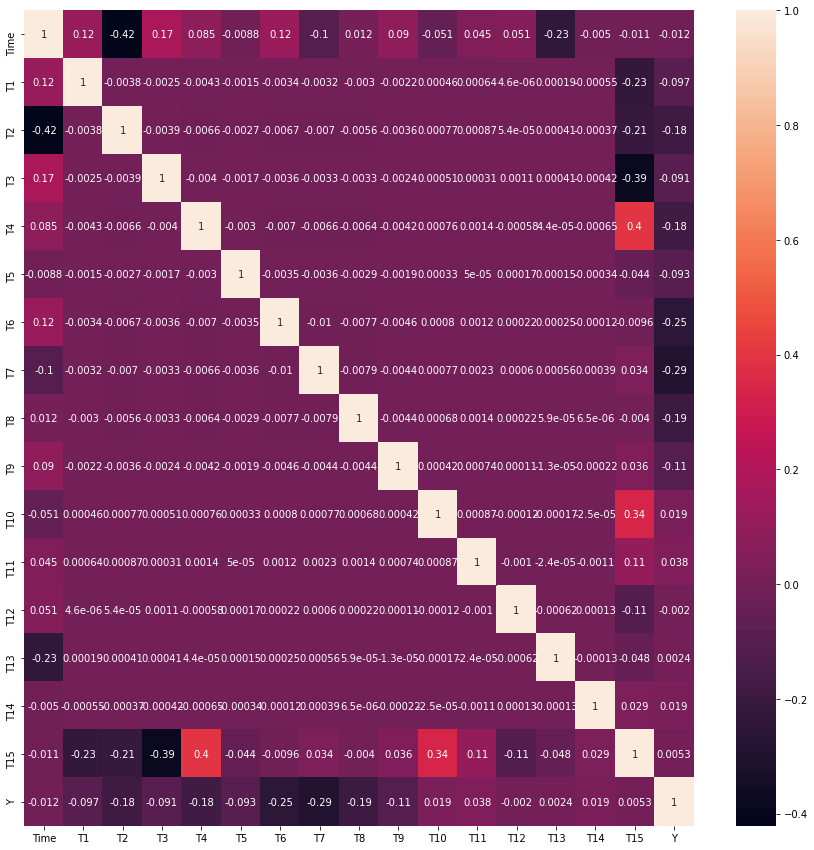

In [ ]:
df = DataFrame(train)

corrMatrix = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(corrMatrix, annot=True)

#Visualisasi Outlier

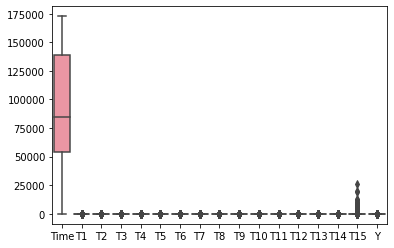

In [ ]:
train_to_show = train.copy()
sns.boxplot(data=train_to_show)

Setelah melakukan plotting dengan boxplot, terlihat bahwa data time memiliki range angka yang sangat tidak sesuai dengan data-data lain. Sehingga harus dilakukan scaling untuk menjadikan data tidak terlalu jauh rangenya.

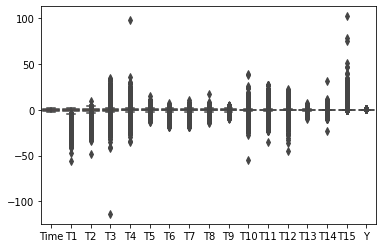

In [ ]:
train_to_show[["Time"]]= preprocessing.scale(train_to_show[["Time"]])
sns.boxplot(data=train_to_show)

Setelah dilakukan scaling terlihat data sudah cukup merata, tapi tetap ada banyak outlier yang masih harus dibuang.

# Data Modification

Saat dilihat, featrues 'Time' memiliki beberapa nilai yang sama, sehingga kami coba untuk meng-group kan setiap baris data dengan nilai 'Time' yang sama dan menjadikannya sebuah baris data baru yang merupakan rata-rata dari kumpulan baris data dengan 'Time' yang sama. Kami telah mencoba mengggunakan fungsi agregasi lain seperti min, max, dan sum. Namun hasil yang paling bagus dan relatif stabil di semua model adalah mean.

In [ ]:
train = train.groupby(by=['Time']).mean()
train = train.reset_index(drop = True)
train['Y'] = np.where(train['Y']>0.5000, 1, 0)

In [ ]:
train['Y'].value_counts()

0    124461
1       100
Name: Y, dtype: int64

In [ ]:
features = [
            # 'Time', 
            'T1', 
            'T2', 
            'T3', 
            'T4', 
            'T5', 
            'T6', 
            'T7', 
            'T8', 
            'T9', 
            'T10',
            'T11',
            'T12',
            'T13',
            'T14',
            'T15']

# Outlier Removal

Data yang memiliki absolut z-score lebih dari 3 biasanya dianggap outliers, tetapi saat kami membuat data-data tersebut nilai korelasi menjadi turun dan hasil akurasi model pun juga turun.

In [ ]:
# # commented
# print('before :', len(train))

# z = np.abs(stats.zscore(train[features]))

# threshold = 3
# print(np.where(z > threshold))

# train = train[(z < threshold).all(axis=1)]
# train = train.reset_index(drop = True)

# print('after :', len(train))


In [ ]:
# #---------------IQR-------------------
# #----------------------------------------------
# Q1=train.quantile(0.25)
# Q3=train.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# #Remove Outlier
# print(train.shape)
# train = train[((train < (Q1 -1.5*IQR))|(train>(Q3+1.5*IQR))).any(axis=1)]
# print(train.shape)
# #----------------------------------------------

Namun, setelah dilakukan scaler dan pembuangan outlier. Hasil akurasi yang didapat saat testing menurun, sekitar  < 85% (Dengan teknik IQR Ourlier Removal). Sehingga kami memutuskan untuk tidak menggunakan ini sebagai hasil akhir kami. Hal ini bisa dikarenakan oleh perbedaan karakteristik yang ada pada data train dan test. Sehingga data outlier yang seharusnya tidak berpengaruh banyak, justru sebaliknya berpengaruh cukup banyak pada model.

# Upsampling

Dapat lihat pada statistik data bahwa data train untuk kelas '1' sangat sedikit jumlahnya, sehingga terjadi masalah ketidakseimbangan data (imbalanced data). Oleh karena itu, kami melakukan upsampling, sehingga data dengan kelas '1' diperbanyak sebanyak data pada kelas '0'. Dengan metode ini, niilai korelasi fitur terhadap target meningkat dan nilai akurasi model juga meningkat cukup signifikan.

In [ ]:
sm = SMOTE()
x_train_tmp, y_train_tmp = sm.fit_sample(train[features], train['Y'])

print(len(x_train_tmp))
print(len(y_train_tmp))

x_train = pd.DataFrame(x_train_tmp, columns=features)
y_train = pd.DataFrame(y_train_tmp, columns=['Y'])

train = pd.concat([x_train, y_train],axis = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


248922
248922


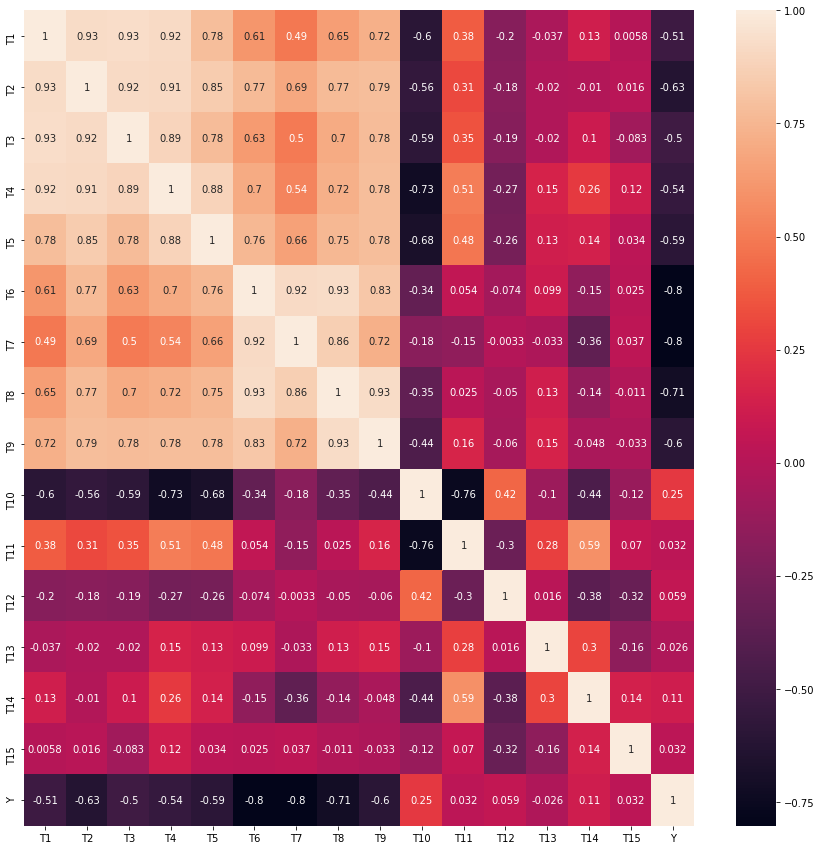

In [ ]:
df = DataFrame(train)

corrMatrix = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(corrMatrix, annot=True)

# Data Transformation

Kami mencoba mentransformasikan data dengan log dan fft, tetapi hasil yang di dapatkan tidak baik sehingga kami memutuskan tidak menggunakannya

In [ ]:
# # commented
# for i in train.columns:
#   if i=='Y':  break
#   train[i] = fft(np.log(train[[i]]-train[[i]].min()+1))
#   test[i] = fft(np.log(test[[i]]-test[[i]].min()+1))
# train = train.astype(float)
# test = test.astype(float)

In [ ]:
# df = DataFrame(train)

# corrMatrix = df.corr()
# plt.figure(figsize=(15, 15)) 
# sns.heatmap(corrMatrix, annot=True)

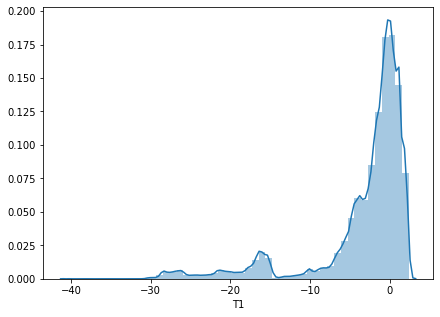

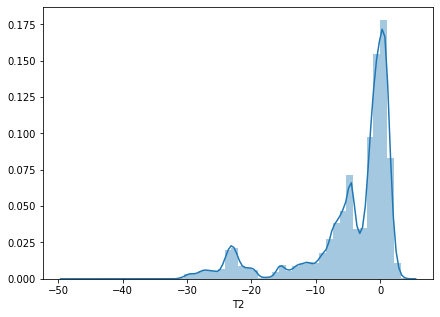

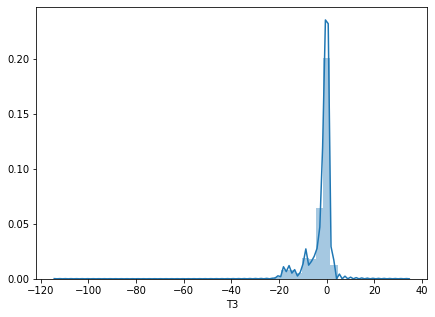

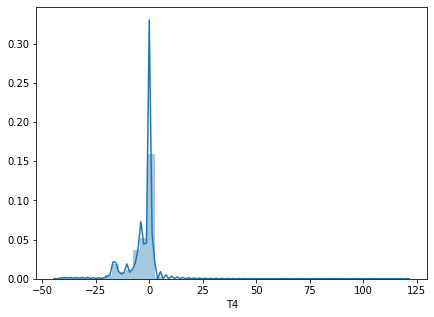

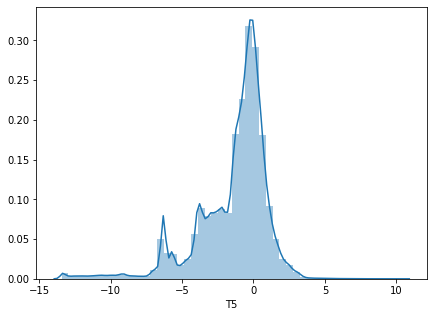

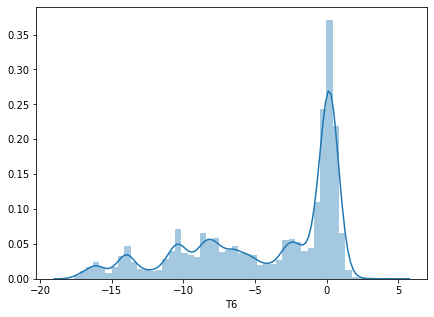

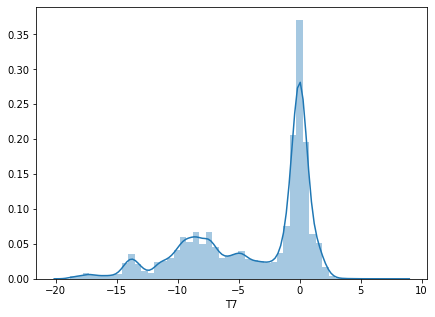

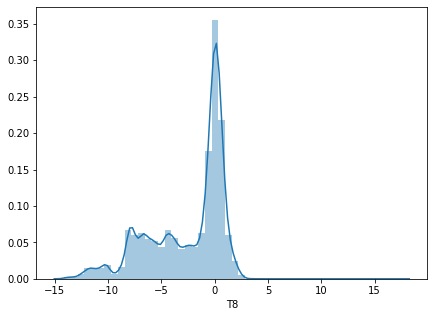

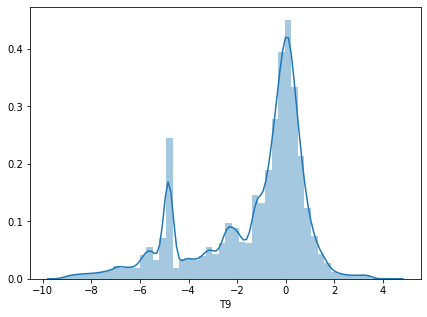

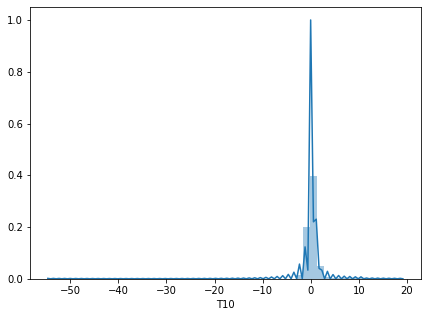

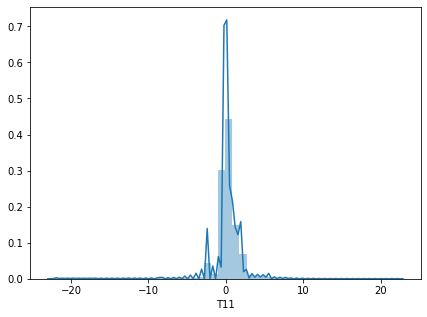

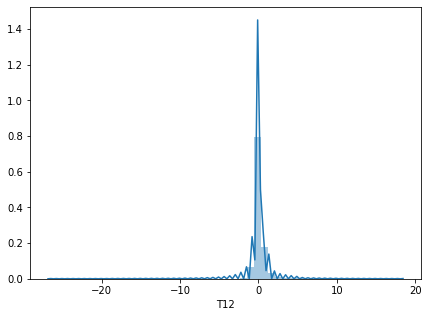

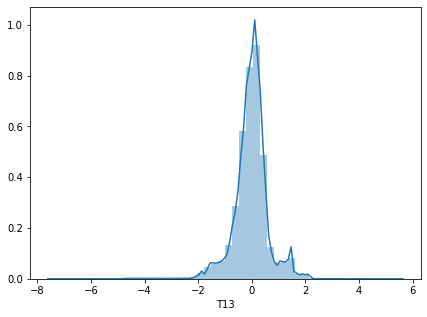

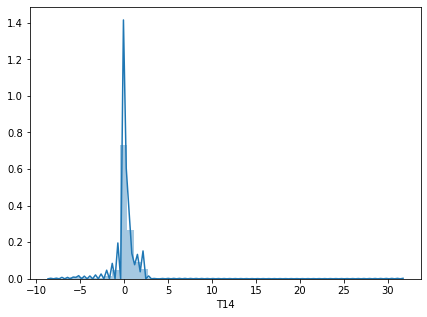

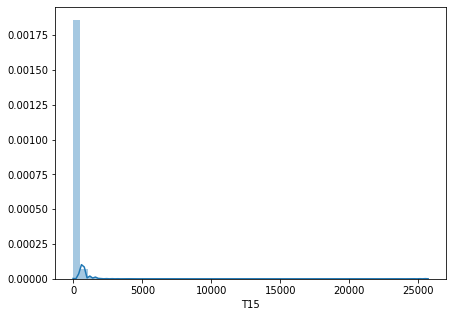

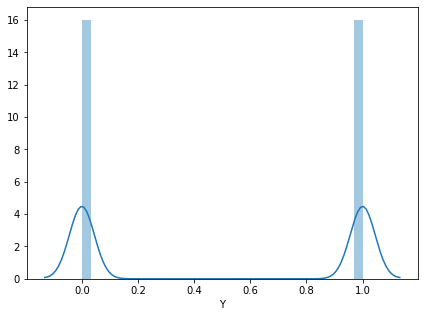

In [ ]:
# for i in train.columns:
#   plt.figure(figsize=(7,5))
#   sns.distplot(train[i])

# Data Normalization/Standarization

Melihat range fitur data yang tidak sama, maka kami melakukan scaling.

In [ ]:
scaler = StandardScaler()

scaled = scaler.fit_transform(train[features])
train[features] = pd.DataFrame(scaled, columns=features)

scaled = scaler.fit_transform(test[features])
test[features] = pd.DataFrame(scaled, columns=features)

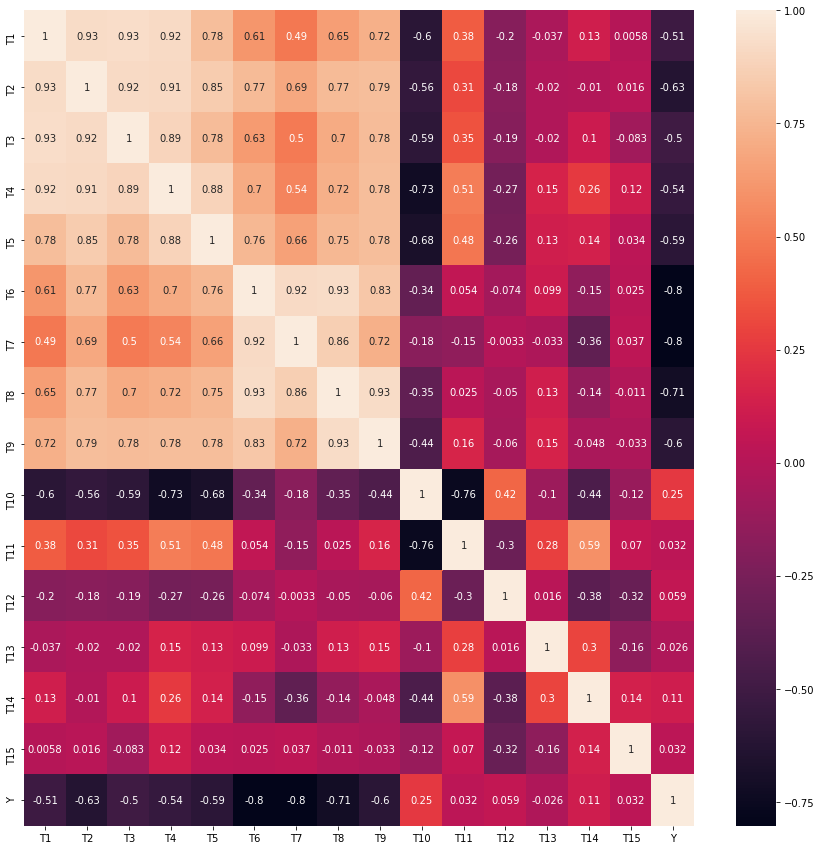

In [ ]:
df = DataFrame(train)

corrMatrix = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(corrMatrix, annot=True)

# Split Data

Data train dibagi menjadi train set dan validation set

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train[features], train['Y'], test_size=0.2)

Mempersiapkan Test set.<br><br>
** **y_test** adalah hasil prediksi yang memiliki nilai public & private score tertinggi saat di submit di kaggle

In [ ]:
x_test = test[features]
y_test = pd.read_csv('key.csv')
y_test = y_test['Category']

# Model Traning and Testing

Mencoba beberapa model dan menggunakan K-Best f_classif untuk pemilihan fitur-nya. Diambil fitur yang dapat memberikan nilai akurasi tertinggi pada validation set, untuk kemudian dijadikan fitur yang akan diproses pada model yang menghasilkan prediksi test set. <br><br>

Ada beberapa model yang memberikan hasil yang relatif baik (pada code adalah model yang tidak di komen)

In [ ]:
names = [
         "Nearest Neighbors", 
        #  "Linear SVM", 
        #  "RBF SVM", 
        #  "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
        #  "QDA",
        #  "Logistic Regression"
         ]
classifiers = [
    KNeighborsClassifier(5),
    # SVC(kernel="poly", C=0.025),
    # SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5, criterion='gini'),
    RandomForestClassifier(max_depth=4, n_estimators=100, criterion='gini'),
    MLPClassifier(alpha=0.7, max_iter=1000),
    AdaBoostClassifier(n_estimators=100,algorithm='SAMME'),
    GaussianNB(),
    # QuadraticDiscriminantAnalysis(),
    # LogisticRegression(solver='lbfgs',)
    ]

for name, model in zip(names, classifiers):
  # FEATURES SELECTION using K-BEST f_classif
  acc = 0
  for i in range(1,len(features)):
    fs = SelectKBest(score_func=f_classif, k=i)
    fs.fit(x_train, y_train)

    XTrain = fs.transform(x_train)
    YTrain = y_train.copy()
    XVal = fs.transform(x_val)
    YVal = y_val.copy()

    model.fit(XTrain, YTrain)

    pred_train = model.predict(XTrain) 
    prediction = model.predict(XVal)

    acc_now= accuracy_score(YVal, prediction)

    if acc_now>acc :
      acc = acc_now
      kbest = i 
      tmp = fs.get_support()

  print(kbest, 'with accuracy', acc)

  selected_features_kbest = []

  for id,i in enumerate(tmp):
    if i == True:
      print("selected       ::",x_train.columns[id],)
      selected_features_kbest.append(x_train.columns[id])
    else:
      print("not selected   ::", x_train.columns[id])


  model.fit(x_train[selected_features_kbest], y_train)
  y_val_pred = model.predict(x_val[selected_features_kbest])

  model_performance = accuracy_score(y_val, y_val_pred)

  print(model_performance)
  print(confusion_matrix(y_val,y_val_pred))

  y_test_pred = model.predict(x_test[selected_features_kbest])
  y_test_pred = y_test_pred.astype(int)
  y_test_pred = pd.DataFrame(y_test_pred)
  y_test_pred.index +=1  
  y_test_pred.columns = ['Category']
  y_test_pred.to_csv(name+'.csv',index_label='Id') 
  files.download(name+'.csv')
  print(name, accuracy_score(y_test, y_test_pred) )
  print(confusion_matrix(y_test, y_test_pred))

13 with accuracy 0.9989153359445616
selected       :: T1
selected       :: T2
selected       :: T3
selected       :: T4
selected       :: T5
selected       :: T6
selected       :: T7
selected       :: T8
selected       :: T9
selected       :: T10
selected       :: T11
selected       :: T12
not selected   :: T13
selected       :: T14
not selected   :: T15
0.9989153359445616
[[24832    54]
 [    0 24899]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nearest Neighbors 0.91
[[52  2]
 [ 7 39]]
14 with accuracy 0.9826654614843828
selected       :: T1
selected       :: T2
selected       :: T3
selected       :: T4
selected       :: T5
selected       :: T6
selected       :: T7
selected       :: T8
selected       :: T9
selected       :: T10
selected       :: T11
selected       :: T12
not selected   :: T13
selected       :: T14
selected       :: T15
0.9826654614843828
[[24367   519]
 [  344 24555]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Decision Tree 0.88
[[44 10]
 [ 2 44]]
14 with accuracy 0.9693481972481671
selected       :: T1
selected       :: T2
selected       :: T3
selected       :: T4
selected       :: T5
selected       :: T6
selected       :: T7
selected       :: T8
selected       :: T9
selected       :: T10
selected       :: T11
selected       :: T12
not selected   :: T13
selected       :: T14
selected       :: T15
0.9702721703324294
[[24774   112]
 [ 1368 23531]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest 0.96
[[53  1]
 [ 3 43]]
14 with accuracy 0.974450135583007
selected       :: T1
selected       :: T2
selected       :: T3
selected       :: T4
selected       :: T5
selected       :: T6
selected       :: T7
selected       :: T8
selected       :: T9
selected       :: T10
selected       :: T11
selected       :: T12
not selected   :: T13
selected       :: T14
selected       :: T15
0.971939339158381
[[24634   252]
 [ 1145 23754]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Neural Net 0.91
[[49  5]
 [ 4 42]]
14 with accuracy 0.9895952596163503
selected       :: T1
selected       :: T2
selected       :: T3
selected       :: T4
selected       :: T5
selected       :: T6
selected       :: T7
selected       :: T8
selected       :: T9
selected       :: T10
selected       :: T11
selected       :: T12
not selected   :: T13
selected       :: T14
selected       :: T15
0.9895952596163503
[[24677   209]
 [  309 24590]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AdaBoost 0.9
[[47  7]
 [ 3 43]]
3 with accuracy 0.9488600984232198
not selected   :: T1
not selected   :: T2
not selected   :: T3
not selected   :: T4
not selected   :: T5
selected       :: T6
selected       :: T7
selected       :: T8
not selected   :: T9
not selected   :: T10
not selected   :: T11
not selected   :: T12
not selected   :: T13
not selected   :: T14
not selected   :: T15
0.9488600984232198
[[24618   268]
 [ 2278 22621]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Naive Bayes 0.92
[[49  5]
 [ 3 43]]


In [ ]:
#Tuning Hyperparameter
# parameter_space = {
#     'activation': ['tanh', 'relu','logistic','identity'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.001, 0.1],
#     'learning_rate': ['constant','adaptive'],
# }

Pada proses training, tunning hyperparameter juga sudah dilakukan dengan menggunakan GridSearchCV dengan berbagai parameter, tapi hasil yang didapat pada data test menurun juga. Sehingga kami tidak menggunakan tunning hyperparameter ini.